In [1]:
#URL: https://github.com/RobinMillford/HR-Analytics-Employee-Performance-Analysis/tree/main

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import warnings
import seaborn as sns
import numpy as np

In [3]:
!pwd
!ls
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive/ML-Datasets

warnings.filterwarnings("ignore")
df = pd.read_csv('/content/drive/MyDrive/ML-Datasets/EmployeeDataset.csv')
print(df.info())
df.head(5)

/content
drive  sample_data
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/
/content/drive/MyDrive/ML-Datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won      

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB
None


Script to Unclean the data

In [5]:
import random

for _ in range(10):
    # Introduce outliers (replace with extreme values)
    row = random.randint(0, len(df))
    df.loc[row, 'length_of_service'] = random.choice([-99999, 99999])

for _ in range(10):
    # Introduce outliers (replace with extreme values)
    row = random.randint(0, len(df))
    df.loc[row, 'awards_won'] = random.choice([-99999, 99999])

for _ in range(10):
    # Introduce outliers (replace with extreme values)
    row = random.randint(0, len(df))
    df.loc[row, 'no_of_trainings'] = random.choice([-99999, 99999])

for _ in range(10):
    # Introduce outliers (replace with extreme values)
    row = random.randint(0, len(df))
    df.loc[row, 'avg_training_score'] = random.choice([-99999, 99999])

df.loc[2100:4000, 'gender'] = df.loc[2100:4000, 'gender'].str.upper()


Data Cleaning/Processing

1. Handling Duplicates

In [6]:
duplicates = df.duplicated()
print(duplicates.sum())

df = df.drop_duplicates()

2


2. Handling Missing Values

In [7]:
df = df.dropna(axis=0)
df = df.reset_index(drop=True)


3. Text Data Cleaning

In [8]:
df['gender'] = df['gender'].str.lower()
df['department'] = df['department'].str.lower()
df['region'] = df['region'].str.lower()
df['recruitment_channel'] = df['recruitment_channel'].str.lower()
df['education'] = df['education'].str.lower()

4. Outlier Detection and Handling in Numerical Data


In [9]:
# Column: avg_training_score
k = 10  # Adjust the threshold multiplier as needed
Q1 = df['length_of_service'].quantile(0.25)
Q3 = df['length_of_service'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

outliers = df[(df['length_of_service'] < lower_bound) | (df['length_of_service'] > upper_bound)]
df = df[~((df['length_of_service'] < lower_bound) | (df['length_of_service'] > upper_bound))]

In [10]:
# Column: avg_training_score
k = 1000  # Adjust the threshold multiplier as needed
Q1 = df['avg_training_score'].quantile(0.25)
Q3 = df['avg_training_score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR
print(lower_bound, upper_bound)
outliers = df[(df['avg_training_score'] < lower_bound) | (df['avg_training_score'] > upper_bound)]
df = df[~((df['avg_training_score'] < lower_bound) | (df['avg_training_score'] > upper_bound))]

-23949.0 24075.0


5. Outlier Detection and Handling in Numerical Data with Categorical Values


In [11]:
df = df.query(f"1 <= no_of_trainings <= 9")
df = df.query(f"0 <= awards_won <= 1")

6. Categorical Data Handling

In [12]:
department_map = {'hr':0, 'sales & marketing':1, 'procurement':2, 'finance':3, 'analytics':4, 'technology':5, 'operations':6, 'legal':7, 'r&d':8}
region_map = {'region_4':4, 'region_13':13, 'region_2':2, 'region_29':29, 'region_7':7, 'region_22':22,
 'region_16':16, 'region_17':17, 'region_24':24, 'region_11':11, 'region_27':27, 'region_9':9,
 'region_20':20, 'region_34':34, 'region_23':23, 'region_8':8, 'region_14':14, 'region_26':26,
 'region_31':31, 'region_19':19, 'region_28':28, 'region_15':15, 'region_3':3, 'region_25':25,
 'region_12':12, 'region_30':30, 'region_10':10, 'region_33':33, 'region_32':32, 'region_5':5,
 'region_6':6, 'region_21':21, 'region_1':1, 'region_18':18}
education_map = {'bachelors':0, 'masters & above':1, 'below secondary':2}
recruitment_channel_map = {'other':0, 'sourcing':1, 'referred':2}
gender_map = {'f':0, 'm':1}


df['gender'] = df['gender'].map(gender_map)
df['region'] = df['region'].map(region_map)
df['recruitment_channel'] = df['recruitment_channel'].map(recruitment_channel_map)
df['department'] = df['department'].map(department_map)
df['education'] = df['education'].map(education_map)


7. DataType Conversion

In [13]:
df['avg_training_score'] = df['avg_training_score'].astype(float)


8. Normalization and Scaling




In [14]:
df['avg_training_score'] = (df['avg_training_score'] - df['avg_training_score'].min()) / (df['avg_training_score'].max() -  df['avg_training_score'].min())
df['length_of_service'] = (df['length_of_service'] - df['length_of_service'].min()) / (df['length_of_service'].max() -  df['length_of_service'].min())
# AGE
# df['age'] = (df['age'] - df['age'].min()) / (df['age'].max() -  df['age'].min())


9. Correlation of the columns

In [15]:
correlation_matrix = df.corr()

correlation_matrix = correlation_matrix.to_numpy()
drop_columns = []
for i in range(len(correlation_matrix)):
  flag = 0
  if i == 0 or i == 12: continue
  for x in correlation_matrix[i]:
    if int(x) == 1 or (x < 0.1 and x>-0.1):
      continue
    else:
      flag = 1
      break
  if flag == 0:
    print("Column:",i, df.columns[i],"to be removed")
    drop_columns.append(df.columns[i])

df = df.drop(columns = drop_columns, axis=1)

Column: 5 recruitment_channel to be removed
Column: 6 no_of_trainings to be removed


In [16]:
category_labels = ['sales & marketing', 'operations','procurement', 'technology','analytics', 'hr', 'finance', 'r&d', 'legal']

department = df["department"].value_counts().index
print(department)
department_cnt = df["department"].value_counts().values

Int64Index([1, 6, 2, 5, 4, 0, 3, 8, 7], dtype='int64')


10. Scale the Dataset

#Phase 2

In [17]:
df.sample(15)
df.info()
print(df.sample(15))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15387 entries, 0 to 15421
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            15387 non-null  int64  
 1   department             15387 non-null  int64  
 2   region                 15387 non-null  int64  
 3   education              15387 non-null  int64  
 4   gender                 15387 non-null  int64  
 5   age                    15387 non-null  int64  
 6   previous_year_rating   15387 non-null  float64
 7   length_of_service      15387 non-null  float64
 8   KPIs_met_more_than_80  15387 non-null  int64  
 9   awards_won             15387 non-null  int64  
 10  avg_training_score     15387 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 1.4 MB
       employee_id  department  region  education  gender  age  \
7161         27461           2      31          0       0   26   
4548         39106           1   

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture



In [19]:
df = df.drop('employee_id', axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Creating a StandardScaler instance
scaler = StandardScaler()

scaled_data = df
# Scaling the numerical columns
scaled_data[numerical_columns] = scaler.fit_transform(scaled_data[numerical_columns])

1. K_Means

[1 1 1 ... 0 1 0]
Silhouette Score: 0.1755228082210227


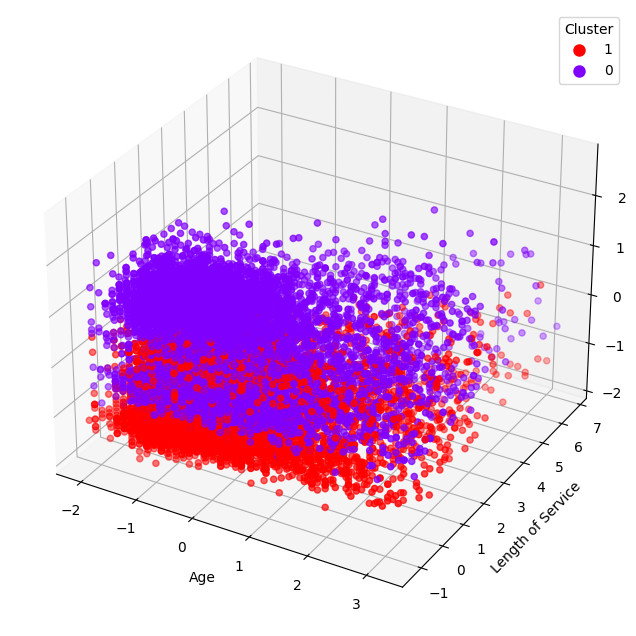

In [36]:
data = scaled_data
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

labels = kmeans.labels_

print(labels)

data['promotion_with_kmeans'] = labels

silhouette_avg = silhouette_score(data, labels)
print("Silhouette Score:", silhouette_avg)

fig = plt.figure(figsize=(15, 8))
plt.subplots_adjust(right=0.9)

ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data['age'], data['length_of_service'], data['avg_training_score'], c=data['promotion_with_kmeans'], cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Length of Service')
ax.set_zlabel('Average Training Score')
legend_labels = data['promotion_with_kmeans'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sc.cmap(sc.norm(label)), markersize=10) for label in legend_labels]
ax.legend(legend_handles, legend_labels, title='Cluster', loc='upper right')
plt.show()

2. Gaussian Mixture Clustering Model

In [39]:
k = 2  # Adjust the number of clusters based on your needs

data_gmm = scaled_data
gmm = GaussianMixture(n_components=k, random_state=42)

gmm.fit(data_gmm)

labels_gmm = gmm.predict(data_gmm)

data['cluster_gmm'] = labels_gmm

silhouette_avg = silhouette_score(data_gmm, labels_gmm)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.1755228082210227


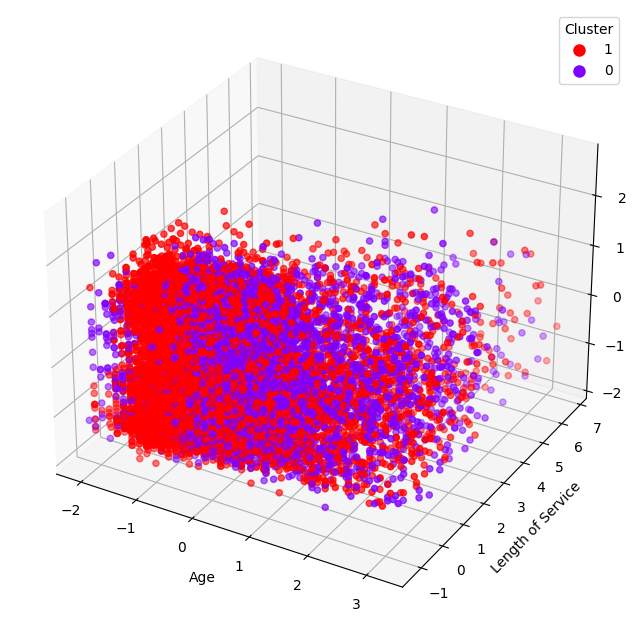

In [23]:
fig = plt.figure(figsize=(15, 8))
plt.subplots_adjust(right=0.9)
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data['age'], data['length_of_service'], data['avg_training_score'], c=data['cluster_gmm'], cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Length of Service')
ax.set_zlabel('Average Training Score')
legend_labels = data['cluster_gmm'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sc.cmap(sc.norm(label)), markersize=10) for label in legend_labels]
ax.legend(legend_handles, legend_labels, title='Cluster', loc='upper right')
plt.show()



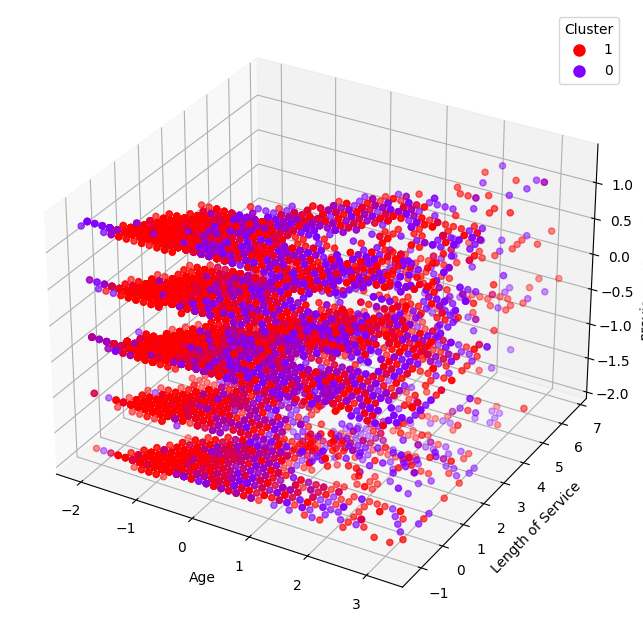

In [24]:
fig = plt.figure(figsize=(15, 8))
plt.subplots_adjust(right=0.9)
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data['age'], data['length_of_service'], data['previous_year_rating'], c=data['cluster_gmm'], cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Length of Service')
ax.set_zlabel('previous_year_rating')
legend_labels = data['cluster_gmm'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sc.cmap(sc.norm(label)), markersize=10) for label in legend_labels]
ax.legend(legend_handles, legend_labels, title='Cluster', loc='upper right')
plt.show()


3. Random Forest Classifier


Feature ranking:
1. Feature department: 0.5436494268068327
2. Feature avg_training_score: 0.3225607631445619
3. Feature KPIs_met_more_than_80: 0.05492633538655641
4. Feature previous_year_rating: 0.03535443605864588
5. Feature gender: 0.012599819082999982
6. Feature age: 0.009877129710277916
7. Feature region: 0.008793407537587025
8. Feature length_of_service: 0.0077624692282358704
9. Feature awards_won: 0.0024645788883595437
10. Feature education: 0.002011634155942765


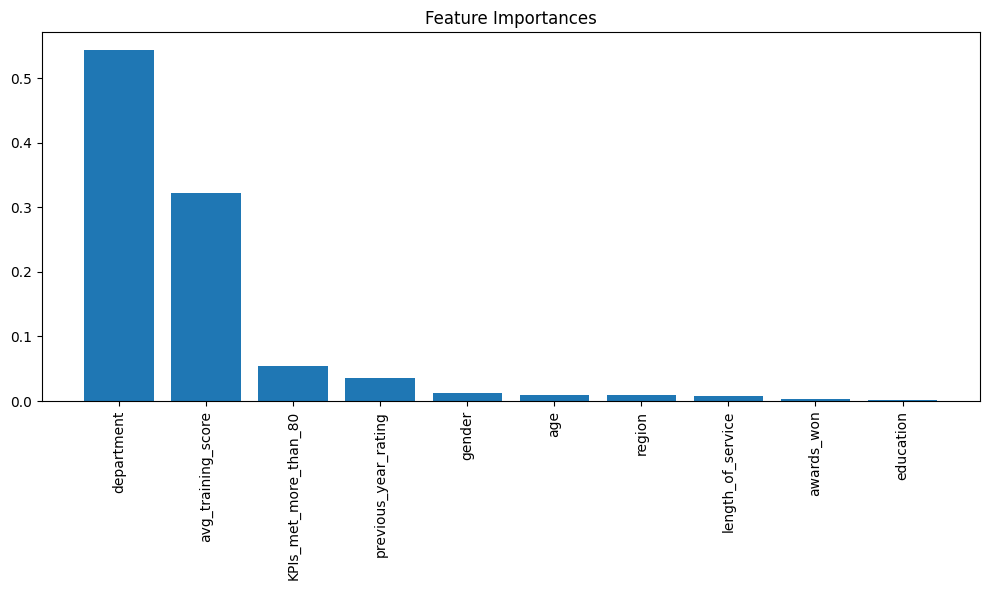

In [25]:
y = data['promotion_with_kmeans']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X = data.drop('cluster_gmm', axis=1)
X = X.drop('promotion_with_kmeans', axis=1)


numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X, y_encoded)

importances = random_forest.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {feature_names[indices[f]]}: {importances[indices[f]]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.005247011046133852
R-squared (R2): 0.9787208695953677


4. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X_sup = data.drop('promotion_with_kmeans',axis=1)
Y_sup = data['promotion_with_kmeans']

X_sup_train, X_sup_test, y_sup_train, y_sup_test = train_test_split(X_sup, Y_sup, test_size=0.3,random_state=42)
model_logit = LogisticRegression(random_state=42)
model_logit.fit(X_sup_train,y_sup_train)
y_sup_pred = model_logit.predict(X_sup_test)
accuracy = accuracy_score(y_sup_test, y_sup_pred)
print(f'Accuracy : {accuracy*100} %')

Accuracy : 99.52350010829542 %


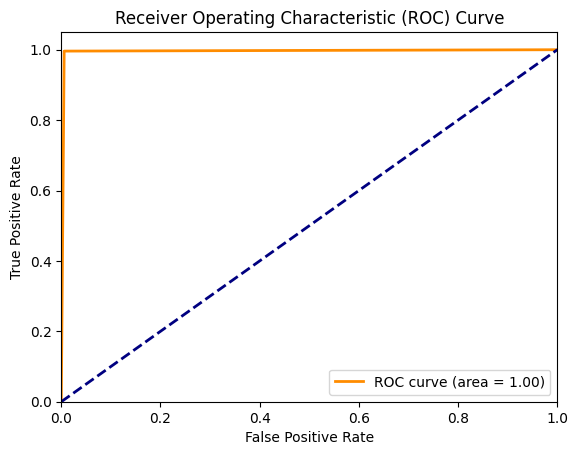

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_sup_test, y_sup_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

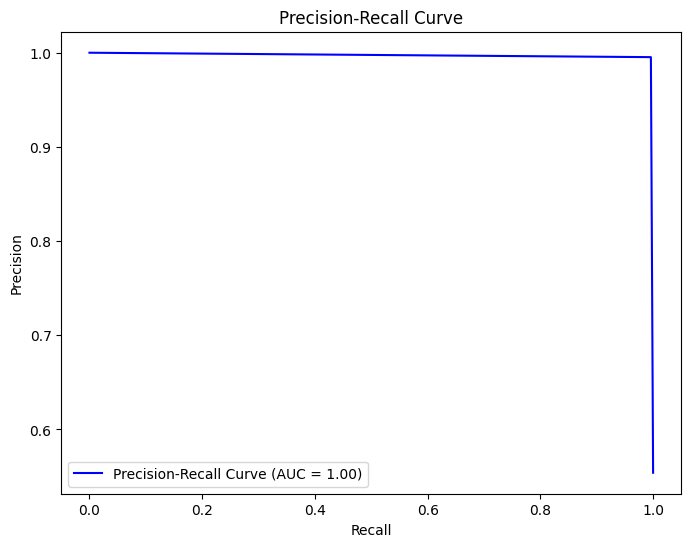

In [29]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_sup_test, y_sup_pred)

auc_score = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

5. SVM Classifier

Accuracy : 99.70760233918129 %


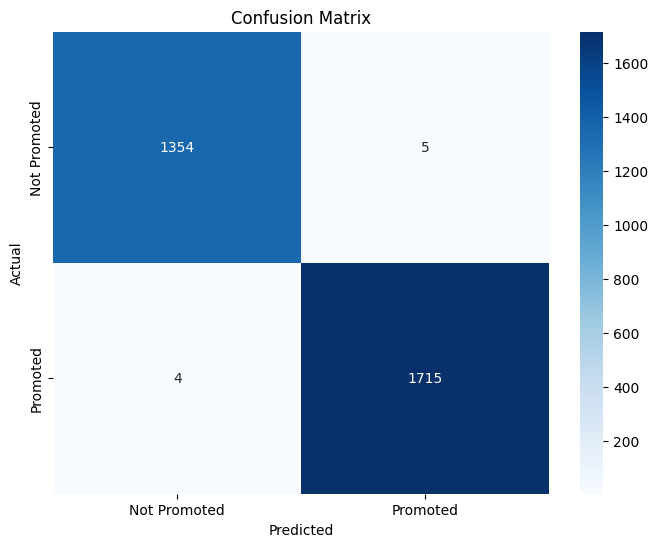

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


X_sup = data.drop('promotion_with_kmeans', axis=1)
Y_sup = data['promotion_with_kmeans']

X_sup_train, X_sup_test, y_sup_train, y_sup_test = train_test_split(X_sup, Y_sup, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_sup_train, y_sup_train)

y_sup_pred = svm_classifier.predict(X_sup_test)
accuracy = accuracy_score(y_sup_test, y_sup_pred)
print(f'Accuracy : {accuracy*100} %')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_sup_test, y_sup_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Promoted', 'Promoted'], yticklabels=['Not Promoted', 'Promoted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


6. KNN - K-Nearest Neighbors

In [31]:
X = data.drop('promotion_with_kmeans', axis=1)
y = data['promotion_with_kmeans']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.9860298895386614
Confusion Matrix:
[[1343   16]
 [  27 1692]]


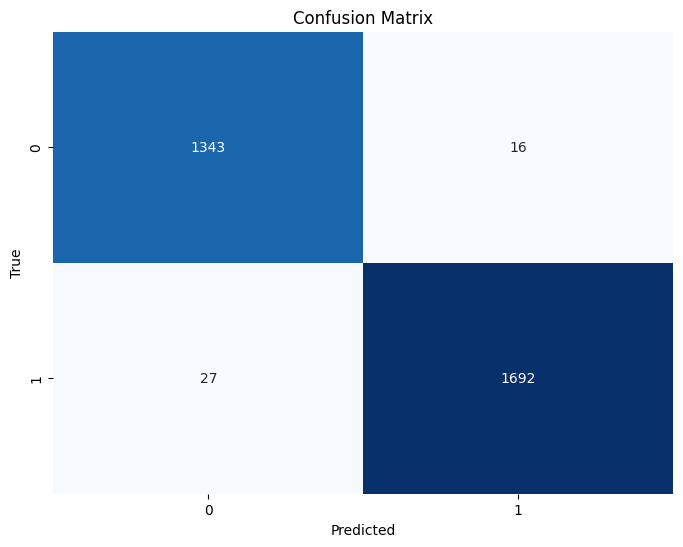

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

7. XGBoost

In [33]:
import xgboost as xgb

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9942


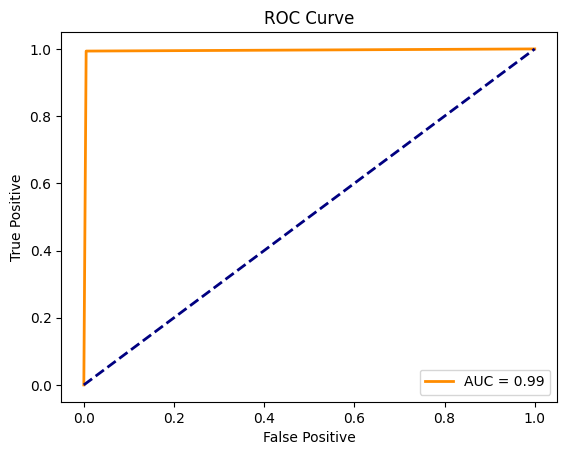

In [34]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()